In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/iris.data", header = None)

In [5]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df[4].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

In [8]:
labels = df[4].unique()
label_dict = {}
for index, possible_label in enumerate(labels):
    label_dict[possible_label] = index

In [9]:
df['label'] = df[4].replace(label_dict)

In [10]:
df_train = pd.concat([df[0:40], df[50:90], df[100:140]])

In [12]:
df_test = df.drop(index = df_train.index)

In [13]:
df_test

,0,1,2,3,4,label
40,5.0,3.5,1.3,0.3,Iris-setosa,0
41,4.5,2.3,1.3,0.3,Iris-setosa,0
42,4.4,3.2,1.3,0.2,Iris-setosa,0
43,5.0,3.5,1.6,0.6,Iris-setosa,0
44,5.1,3.8,1.9,0.4,Iris-setosa,0
45,4.8,3.0,1.4,0.3,Iris-setosa,0
46,5.1,3.8,1.6,0.2,Iris-setosa,0
47,4.6,3.2,1.4,0.2,Iris-setosa,0
48,5.3,3.7,1.5,0.2,Iris-setosa,0
49,5.0,3.3,1.4,0.2,Iris-setosa,0


In [40]:
df_train = df_train.sample(frac = 1)
df_test = df_test.sample(frac = 1)

In [41]:
X_train = df_train[[0,1,2,3]]
Y_train = df_train['label']
X_test = df_test[[0,1,2,3]]
Y_test = df_test['label']

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [78]:
hidden_layers = np.array([[5,7,5], [6,6,6], [7,10,5], [6,10,8], [7,12,8]])

In [79]:
hidden_layers.shape

(5, 3)

In [80]:
neurons = np.sum(hidden_layers, axis = 1)

In [81]:
neurons

array([17, 18, 22, 24, 27])

In [82]:
accuracy = np.zeros(5)

In [83]:
accuracy

array([0., 0., 0., 0., 0.])

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
for i, layers in enumerate(hidden_layers):
  clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=layers, random_state=50)
  clf.fit(X_train, Y_train)
  prediction = clf.predict(X_test)
  print(f'Iteration {i}, Hidden Layer = {layers}')
  accuracy[i] = accuracy_score(Y_test, prediction)
  precision = precision_score(Y_test, prediction, average='macro')
  recall = recall_score(Y_test, prediction, average='macro')
  f1 = f1_score(Y_test, prediction, average='macro')
  print(f'Accuracy Score: {accuracy[i]}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')
  print(confusion_matrix(Y_test, prediction))

Iteration 0, Hidden Layer = [5 7 5]
Accuracy Score: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5555555555555555
[[10  0  0]
 [ 0 10  0]
 [ 0 10  0]]
Iteration 1, Hidden Layer = [6 6 6]
Accuracy Score: 0.3333333333333333
Precision: 0.1111111111111111
Recall: 0.3333333333333333
F1 Score: 0.16666666666666666
[[10  0  0]
 [10  0  0]
 [10  0  0]]
Iteration 2, Hidden Layer = [ 7 10  5]
Accuracy Score: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5555555555555555
[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]
Iteration 3, Hidden Layer = [ 6 10  8]
Accuracy Score: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5555555555555555
[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]
Iteration 4, Hidden Layer = [ 7 12  8]
Accuracy Score: 0.9
Precision: 0.923076923076923
Recall: 0.9
F1 Score: 0.8976982097186701
[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


In [90]:
import matplotlib.pyplot as plt

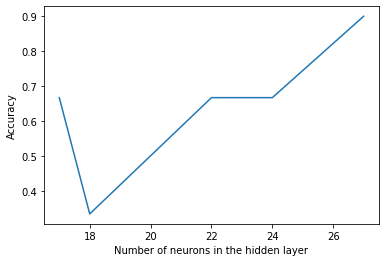

In [91]:
# Plot the graph of error vs learning rate
plt.plot(neurons, accuracy)
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.show()